<a href="https://colab.research.google.com/github/Tamerly/Data_analisys_learning/blob/main/clients_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [7]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [8]:
user_data.shape

(2954, 3)

In [9]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [10]:
user_data.isnull().sum()

client     0
premium    0
age        0
dtype: int64

In [11]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [12]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [13]:
logs.isnull().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [14]:
logs.shape

(4500, 4)

In [ ]:
logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

In [ ]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


Какой клиент совершил больше всего успешных операций?

In [15]:
# получение серии с наибольшим количеством успешных операций на клиента
success_numbers = logs \
    .query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values('success', ascending=False) \
    .head(12)

In [16]:
# записываем в переменную наибольшее число
maximum_success = success_numbers.success.max()
maximum_success

41

In [17]:
# получение серии с клиентами, у которых максимальное количество успешных операций
success_numbers.query("success == @maximum_success")

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41


In [18]:
# получаем список этих клиентов
client_list_count = success_numbers \
    .query("success == @maximum_success") \
    .sort_values('client') \
    .client \
    .tolist()
client_list_count

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

С какой платформы было совершено наибольшее количество успешных операций?

In [20]:
platform_success_count = logs \
    .query("success == True") \
    .groupby('platform', as_index=False) \
    .agg({'success': 'count'}) \
    .rename(columns={'success': 'amount'}) \
    .sort_values('amount', ascending=False)
platform_success_count

,platform,amount
1,phone,2019
0,computer,1090
2,tablet,180


Наиболее популярная платформа среди премиум-пользователей

In [26]:
premium_clients = user_data \
    .query('premium == True')
success_logs = logs \
    .query('success == True')
success_logs.shape

(3289, 4)

In [27]:
premium_clients_logs = premium_clients.merge(success_logs, on='client')
premium_clients_logs

,client,premium,age,success,platform,time
0,88203,True,35,True,phone,1585450059
1,32603,True,20,True,computer,1585473383
2,53182,True,24,True,phone,1585406474
3,1813,True,27,True,phone,1585415627
4,41722,True,52,True,computer,1585452816
...,...,...,...,...,...,...
298,52373,True,36,True,phone,1585405142
299,13688,True,66,True,computer,1585453923
300,40643,True,22,True,phone,1585413473
301,53774,True,50,True,phone,1585422804


In [28]:
premium_clients_logs.platform.value_counts()

phone       177
computer    108
tablet       18
Name: platform, dtype: int64

<ipython-input-35-ab6f5589aed5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_data.query('premium == False').age)
<ipython-input-35-ab6f5589aed5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_data.query('premium == True').age)


<Axes: xlabel='age', ylabel='Density'>

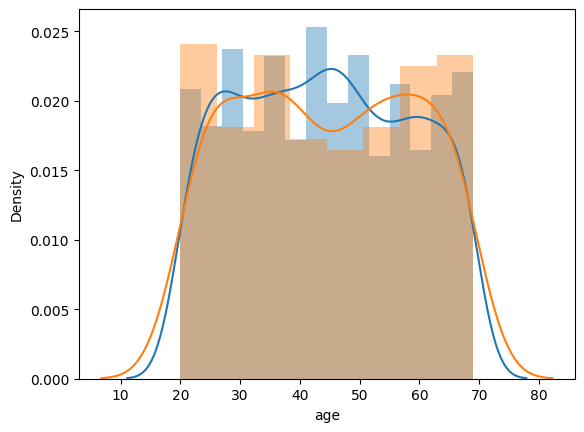

In [35]:
sns.distplot(user_data.query('premium == False').age)
sns.distplot(user_data.query('premium == True').age)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.distplot(user_data.query('premium == False').age, ax=ax[0], color='green')
sns.distplot(user_data.query('premium == True').age, ax=ax[1], color='red')

График распределения числа успешных операций:

* x – число успешных операций
* y – число клиентов, совершивших такое количество успешных операций

In [47]:
df = user_data.merge(logs, on='client')

In [49]:
df

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [53]:
clients_success_number = df.groupby('client') \
    .agg({'success': 'sum'})
clients_success_number

,success
client,
40,1
75,1
81,1
132,1
164,1
...,...
99926,1
99927,1
99931,1


<ipython-input-54-1e6112d10fcb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clients_success_number, kde=False)


<Axes: >

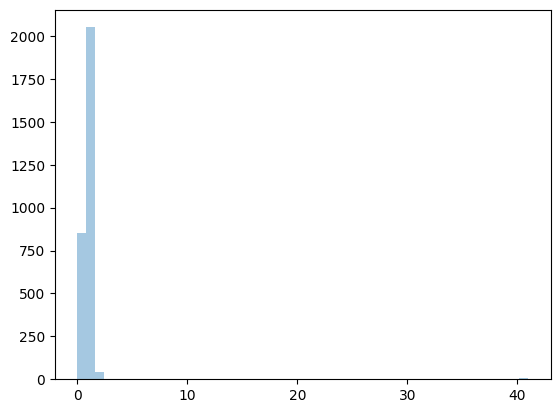

In [54]:
sns.distplot(clients_success_number, kde=False)

In [55]:
clients_success_number.value_counts()

success
1          2051
0           850
2            42
41            9
3             1
40            1
dtype: int64

* Несколько клиентов совершили более 40 успешных действий
* Бóльшая часть наблюдений сосредоточена в левой части графика

In [66]:
client_on_pc_success = df \
    .query("platform == 'computer' and success == True") \
    .groupby('age', as_index=False) \
    .agg({'success': 'sum'})
client_on_pc_success

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26
5,25,33
6,26,14
7,27,14
8,28,49
9,29,17


<Axes: xlabel='age', ylabel='success'>

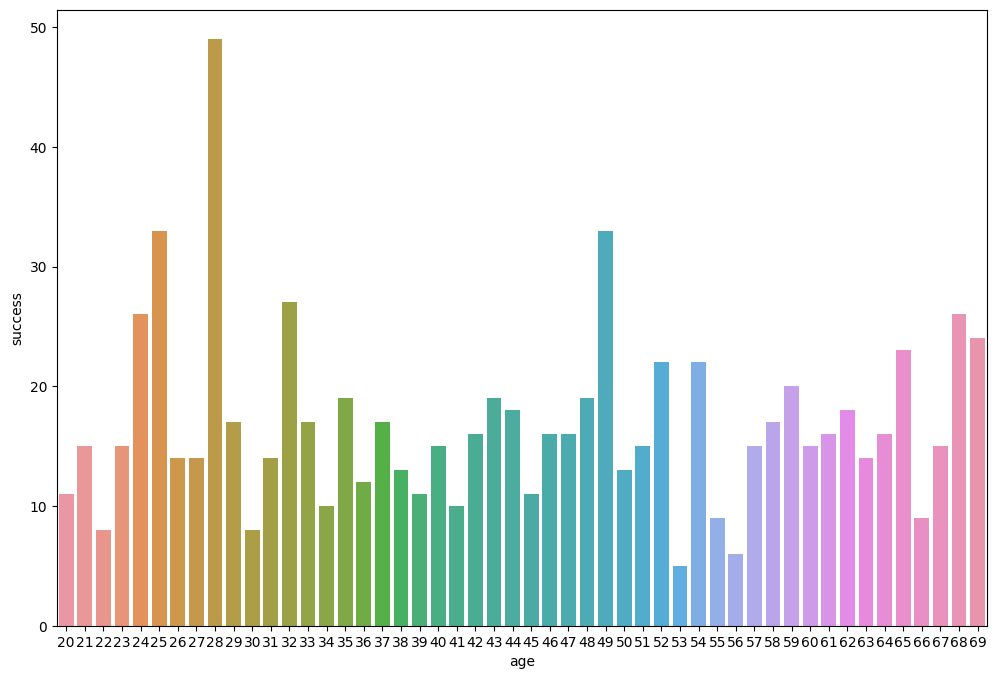

In [70]:
plt.figure(figsize=(12, 8))
sns.barplot(x=client_on_pc_success['age'], y=client_on_pc_success['success'])